In [23]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from classes import *
from constants import *

##### Velocity space in ASCII format $\rightarrow$ frequency space NumPy format

In [24]:
# Parse ASCII format DSN observations
def process_file(filepath, rest_frequency):
    with open(filepath, "r") as f:
        content = f.readlines()

    data = []
    for line in content:
        if line.strip():  # Skip empty lines
            parsed_line = list(map(float, line.split()))
            data.append(parsed_line)

    velocities, intensities = np.array(data).T
    frequencies = velocity_to_frequency(velocities, rest_frequency)

    return frequencies, intensities

def velocity_to_frequency(velocity, rest_frequency):
    c = 299792.458
    frequency_shift = (velocity / c) * rest_frequency
    frequencies = rest_frequency - frequency_shift
    return frequencies

# Currently set up for template species HC5N...
def plot_spectrum(frequencies, intensities, label, ax):
    ax.plot(frequencies, intensities, label=f'HC5N {label}')
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
    ax.set_title(f'HC5N {label} Spectrum')
    ax.set_xlabel('Frequency (MHz)')
    ax.set_ylabel('Intensity')
    ax.grid(True)

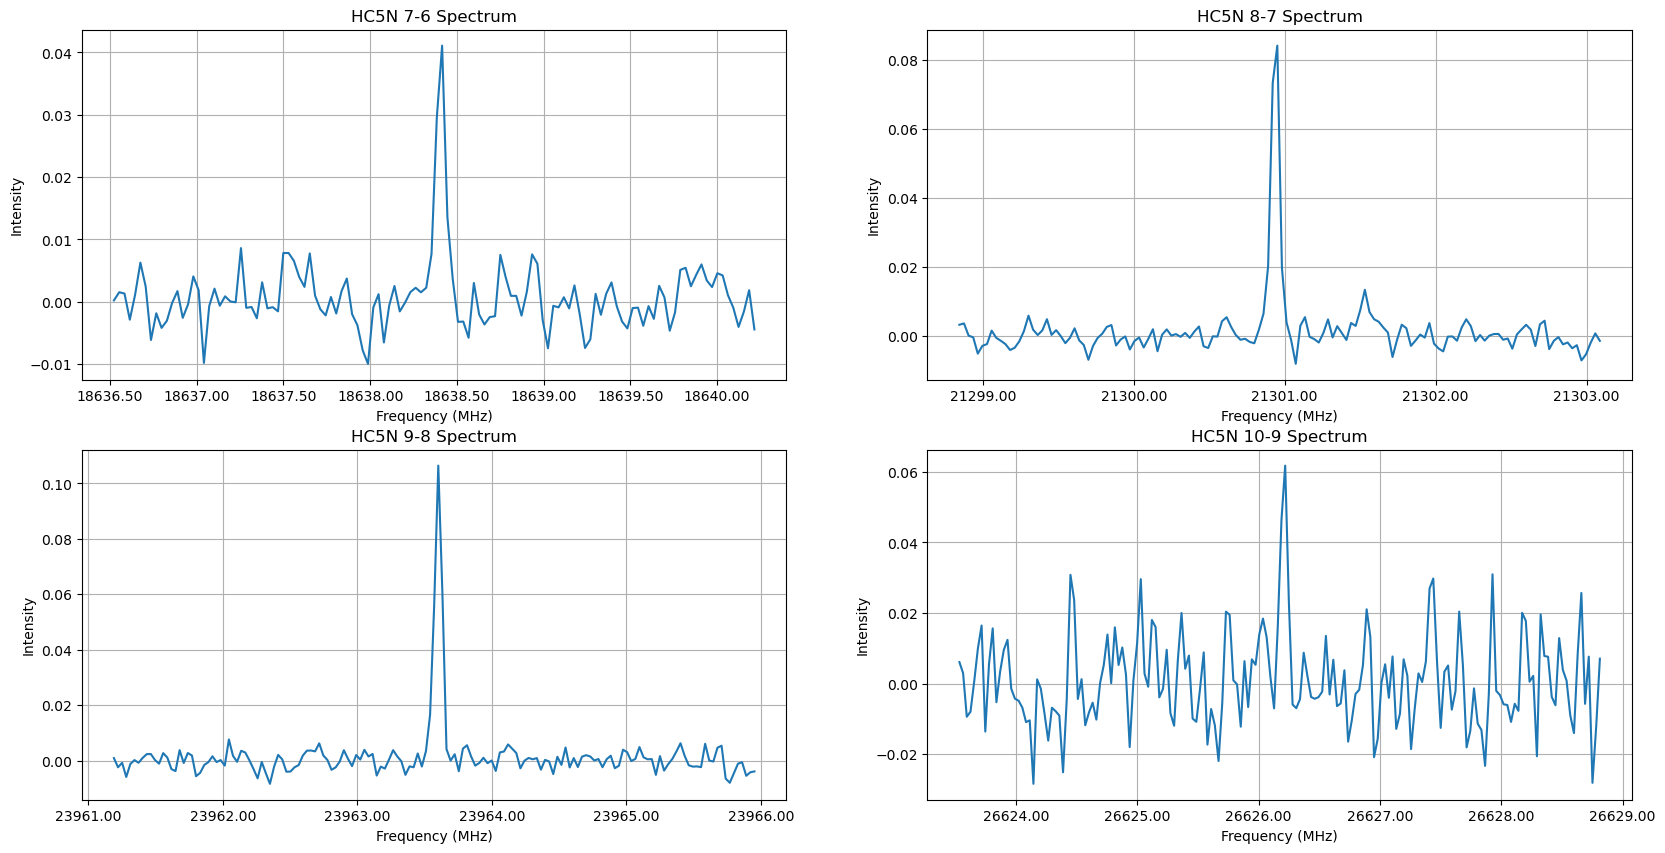

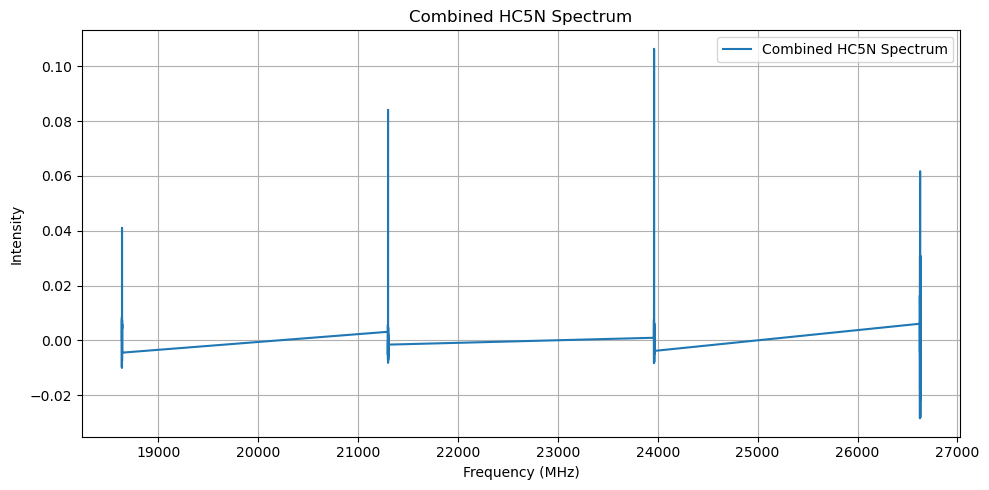

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10)) 
axes = axes.flatten()

spectra = [
    ("DSN_data/CHA-C2-HC5N7-6_1.86386164E+04.spec", 18638.6164, '7-6'),
    ("DSN_data/CHA-C2-HC5N8-7_2.13012614E+04.spec", 21301.2614, '8-7'),
    ("DSN_data/CHA-C2-HC5N9-8_2.39639007E+04.spec", 23963.9007, '9-8'),
    ("DSN_data/CHA-C2-HC5N10-9_2.6626543E+04.spec", 26626.543, '10-9')
]

all_frequencies = []
all_intensities = []

for i, (path, freq, label) in enumerate(spectra):
    frequencies, intensities = process_file(path, freq)
    plot_spectrum(frequencies, intensities, label, axes[i])
    all_frequencies.extend(frequencies)
    all_intensities.extend(intensities)

fig_combined, ax_combined = plt.subplots(figsize=(10, 5))
ax_combined.plot(all_frequencies, all_intensities, label='Combined HC5N Spectrum')
ax_combined.set_title('Combined HC5N Spectrum')
ax_combined.set_xlabel('Frequency (MHz)')
ax_combined.set_ylabel('Intensity')
ax_combined.legend()
ax_combined.grid(True)

plt.tight_layout()
plt.show()

In [26]:
BASE_DIR = os.getcwd()
DATA_PATH = os.path.join(BASE_DIR, 'DSN_data', 'C2_hc5n_hfs_chunks.npy')

np.save(DATA_PATH, np.array([all_frequencies, all_intensities]))
print(f"Data saved to {DATA_PATH}")

Data saved to /Users/kahaan/Desktop/Cha1-MCMC/DSN_data/C2_hc5n_hfs_chunks.npy


##### Frequency space in ASCII format $\rightarrow$ frequency space NumPy format

In [16]:
def process_ascii(filepath):
    with open(filepath, "r") as f:
        content = f.readlines()

    data = []
    for line in content:
        if line.strip():  # Skip empty lines
            parsed_line = list(map(float, line.split()))
            data.append(parsed_line)

    frequencies, intensities, _, _ = np.array(data).T
    
    return frequencies, intensities

In [21]:
freq1, int1 = process_ascii("./DSN_data/CHA-MMS1-HC5N10-9.spec")
freq2, int2 = process_ascii("./DSN_data/CHA-MMS1-HC5N9-8.spec")
freq3, int3 = process_ascii("./DSN_data/CHA-MMS1-HC5N8-7.spec")
freq4, int4 = process_ascii("./DSN_data/CHA-MMS1-HC5N7-6.spec")

all_frequencies = []
all_intensities = []

all_frequencies.extend(freq4)
all_frequencies.extend(freq3)
all_frequencies.extend(freq2)
all_frequencies.extend(freq1)

all_intensities.extend(int4)
all_intensities.extend(int3)
all_intensities.extend(int2)
all_intensities.extend(int1)

BASE_DIR = os.getcwd()
DATA_PATH = os.path.join(BASE_DIR, 'DSN_data', 'MMS1_hc5n_hfs_chunks.npy')

np.save(DATA_PATH, np.array([all_frequencies, all_intensities]))
print(f"Data saved to {DATA_PATH}")

Data saved to /Users/kahaan/Desktop/Cha1-MCMC/DSN_data/MMS1_hc5n_hfs_chunks.npy
